# Regresión Lineal

La primera aproximación que estudiaremos para resolver problemas de regresión en aprendizaje supervisado
es la regresión lineal. Dentro del paradigma de la regresión lineal se incluyen numerosos algoritmos de aprendizaje supervisado. Todos los algoritmos de regresión lineal se basan en encontrar relaciones lineales entre los atributos y la clase. Dado que la linealidad es una característica inherente a muchísimos problemas en la naturaleza, las técnicas de regresión lineal han sido utilizadas con éxito en numerosos problemas.

Se distinguen dos tipos fundamentales de regresión: `simple` y `múltiple`. La regresión simple únicamente utiliza
un atributo de entrada, mientras que la regresión múltiple admite varios atributos. 

El algoritmo clásico de regresión lineal, y el más utilizado, se denomina ordinary least squares (`OLS`).

Como sabemos de capítulos anteriores, los modelos de conocimiento en aprendizaje supervisado pueden ser entendidos como funciones, no necesariamente matemáticas, que reciben una entrada (un vector con los valores de los atributos de un ejemplo de test) y devuelven una salida (un valor estimado para la clase del ejemplo de test).

El algoritmo OLS es capaz de generar un modelo que consta de una función matemática muy sencilla: una
combinación lineal de los atributos. En concreto, el modelo que genera OLS puede expresarse matemáticamente
del siguiente modo:


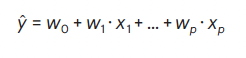


En la ecuación anterior, `yt` es el valor predicho por el algoritmo, `x , ...,x1p`  son los valores de los atributos, `w , ...,w ` perteneciente a los reales son los coeficientes del modelo y `w0` es el término independiente de la combinación lineal.


El entrenamiento mediante OLS, al igual que con cualquier otro algoritmo, parte del conjunto de datos de entrenamiento, compuesto por X (matriz de atributos) e `y` (vector de clases). OLS comienza, entonces, un proceso iterativo de búsqueda de los valores óptimos para los coeficientes y el término independiente, `w , ...,w0p` , del modelo.

Todo proceso de optimización iterativo requiere de una función objetivo (también función de bondad o de coste) para evaluar la bondad de una posible solución, y de un esquema de búsqueda que genere nuevos valores para evaluar en la siguiente iteración. En el caso de OLS, la función objetivo es la sumade errores al cuadrado (`MSE` de mean squared error en inglés) y se trata de encontrar los valores de `w , ...,w0p` que minimizan su valor.


En la figura, los puntos de color verde son los ejemplos de entrenamiento, mientras que la línea recta de
color azul representa el modelo de regresión lineal con unos valores concretos para sus coeficientes.
La función objetivo mide la suma de las longitudes de los segmentos de color rojo (errores) elevadas al
cuadrado.

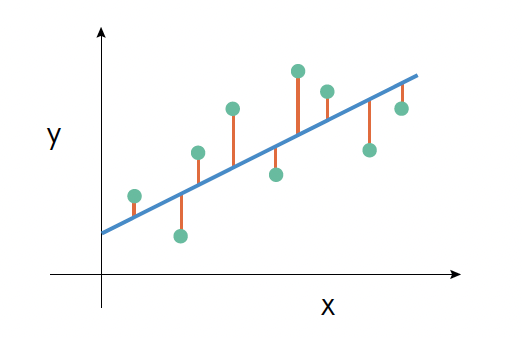

A continuación se ilustra cómo pueden interpretarse los coeficientes del modelo en un conjunto de datos
con un único atributo. Tal como se puede apreciar, el coeficiente w1 es la pendiente de la recta de regresión,
mientras que el término independiente w0 del modelo es la ordenada en el origen (x = 0) de dicha
recta.

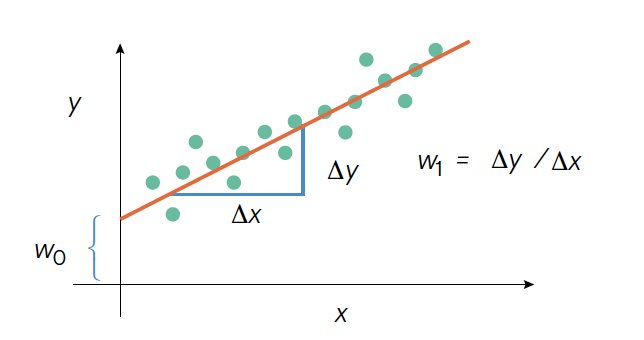


Una vez definida la función objetivo de `OLS`, el algoritmo de búsqueda se encarga de generar valores para
los coeficientes, de forma que en cada iteración se obtenga un valor de la función f menor. El proceso se
repite hasta que se alcance una situación donde no se encuentra ningún cambio en la función f, o bien el
cambio es muy pequeño. El algoritmo de búsqueda más habitual usado en `OLS` es el `descenso de gradiente`

## R2

Una vez definido el proceso de aprendizaje del algoritmo `OLS`, veamos cómo se aplica el modelo aprendido
para producir predicciones en las instancias de test. Este proceso de predicción es muy sencillo. Basta sustituir
los valores `xi` de los atributos de la instancia de test en la ecuación del modelo y evaluarla para producir el
valor de `yt`, el cual será la predicción final del modelo (los valores de `w , ...,w0p` ya están definidos).

Esta métrica es el coeficiente de determinación, o R2, y recoge la cantidad de variabilidad de la clase (con
respecto a su media aritmética) que el modelo es capaz de predecir con respecto al total de variabilidad de
la clase. Su definición se muestra en la siguiente ecuación.

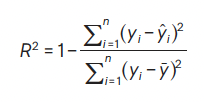

En la anterior ecuación, yr es la media aritmética de los valores de la clase. Un valor de `R2 = 1` implica una
predicción perfecta, si el valor de `R2` fuera menor que 0, el modelo tendría peor eficacia que `DummyRegressor`.

>Note: Esta no es la regresión lineal, sino la bisectriz, que me indica donde se agrupan los grupos respecto los errores.


## Ejemplo 

En el Programa  un ejemplo de aplicación del algoritmo OLS, con el cual aplicamos regresión lineal múltiple sobre el conjunto de datos “Boston”.

In [31]:
import numpy as np
import pandas as pd
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
#from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt

In [32]:
# Carga de datos.
datos = pd.read_csv('Boston.csv')
# datos = datasets.fetch_california_housing
# print(datos)
X = datos.drop(labels='medv', axis=1)
y = datos.medv

In [34]:
# # Métricas de evaluación.
metricas = {
  'MAE':  'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
  'R2':   'r2',}

In [33]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, 
                                                                y, 
                                                                test_size=0.2, 
                                                                random_state=42)
print(np.shape(X_training))
print(np.shape(X_testing))

(404, 14)
(102, 14)


In [35]:
# 2) Extracción de características (Si tuvieras trabajando con imágenes)
# 3) Selección de atributos - Esto es opcional dependiendo el caso de uso. Se determina que todos los atributos son necesarios para poder crear el modelo.
# 4) Estandarización de los datos de entrenamiento

standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)

In [ ]:
# 5) Construcción del algoritmo de aprendizaje.
reg = linear_model.LinearRegression(fit_intercept=True)

In [36]:
# 5.1) Validación cruzada interna

# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_validate( reg, 
                                    X_stdr, 
                                    y_training, 
                                    cv = KFold(n_splits=5, 
                                               shuffle=True, 
                                               random_state=42), 
                                   scoring=metricas)
pprint(cross_val_results)

{'fit_time': array([0.02059102, 0.00086403, 0.00049806, 0.00043082, 0.00043607]),
 'score_time': array([0.00796986, 0.00049901, 0.00041509, 0.00042009, 0.00039601]),
 'test_MAE': array([-3.17505276, -3.48201248, -3.81483113, -3.90644868, -2.7521666 ]),
 'test_MAPE': array([-15.97368062, -16.58349093, -17.25859166, -18.78160931,
       -16.66733576]),
 'test_R2': array([0.67539028, 0.76358588, 0.58991618, 0.75774491, 0.8090727 ]),
 'test_RMSE': array([-4.80413534, -4.81866715, -6.03598413, -5.0900609 , -3.5570083 ])}


In [37]:
# 5.2) Entrenamiento con todos los datos para obtener los coeficientes del modelo.
model = reg.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
w = model.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [-0.49398125 -1.00441943  0.74705409  0.29990035  0.71145431 -1.99128619
  3.17910682 -0.30525727 -3.14196743  2.5108087  -1.64672703 -2.02904438
  1.1358693  -3.63787224]

Término independiente:  22.796534653465343


In [ ]:
# ---- PREDICCIÓN ---- #

In [38]:
# 6) Extracción de las características de test
# 7) Selección de los atributos de test 
# 8) Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [39]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)
display(np.array(y_pred_test))

array([28.97335364, 35.87795794, 13.97366183, 25.61583978, 18.66608153,
       23.64466022, 17.05971239, 14.5264485 , 22.79402759, 19.60618783,
       24.62043501, 19.06428675, -6.27197735, 22.20788474, 18.64849181,
       26.15022718, 20.62835191,  5.77374284, 40.72117979, 17.48530737,
       27.08436097, 29.90818637, 11.65330429, 22.99879937, 17.85048447,
       15.5556251 , 23.31650588, 14.44013189, 22.11106256, 18.20109763,
       22.33391113, 24.79774986, 26.15304018, 17.89425941, 16.52927207,
       17.10592481, 31.77372627, 19.58243073, 23.603617  , 25.2202457 ,
       12.89702838, 31.91216634, 42.90231353, 17.74616574, 27.5000776 ,
       17.06259552, 14.39460992, 26.51167547, 20.10908837, 30.51587021,
       21.74636797, 34.09117218, 16.44234996, 26.62572161, 39.42027423,
       22.49131562, 18.75511558, 32.62323592, 25.35325167, 12.58127149,
       23.23090959, 31.15654212, 31.70938821, 16.555899  , 19.75136599,
       16.30198537, 20.60703158, 26.4253367 , 31.3483927 , 11.44

In [40]:
# Cálculo de las métricas de evaluación.
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('R2:   %.4f' % R2)

MAE:  3.2008
MSE: 24.4978
RMSE: 4.9495
R2:   0.6659


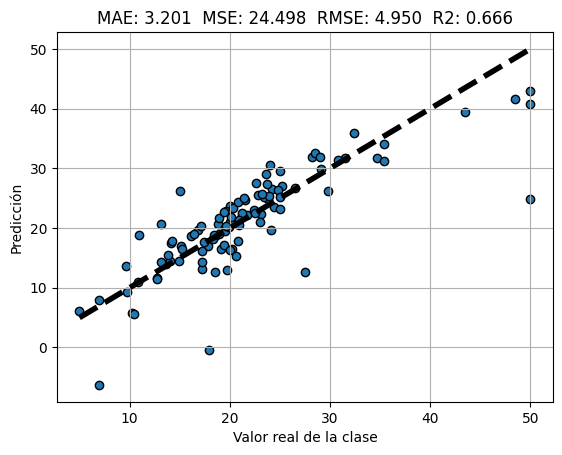

In [41]:
# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
ax.scatter(y_testing, y_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  MSE: %.3f  RMSE: %.3f  R2: %.3f" %
          (MAE,MSE,RMSE,R2))
plt.grid()
plt.show()